In [1]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv("emnist-balanced-train.csv",delimiter = ',')
test = pd.read_csv("emnist-balanced-test.csv", delimiter = ',')
mapp = pd.read_csv("emnist-balanced-mapping.txt", delimiter = ' ', \
                   index_col=0, header=None, squeeze=True)
print("Train: %s, Test: %s, Map: %s" %(train.shape, test.shape, mapp.shape))

Train: (112799, 785), Test: (18799, 785), Map: (47,)


In [4]:
print(train.head())

   45  0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  ...  0.524  0.525  0.526  \
0  36  0    0    0    0    0    0    0    0    0  ...      0      0      0   
1  43  0    0    0    0    0    0    0    0    0  ...      0      0      0   
2  15  0    0    0    0    0    0    0    0    0  ...      0      0      0   
3   4  0    0    0    0    0    0    0    0    0  ...      0      0      0   
4  42  0    0    0    0    0    0    0    0    0  ...      0      0      0   

   0.527  0.528  0.529  0.530  0.531  0.532  0.533  
0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0  

[5 rows x 785 columns]


In [5]:
HEIGHT = 28
WIDTH = 28

In [6]:
train_x = train.iloc[:,1:]
train_y = train.iloc[:,0]

test_x = test.iloc[:,1:]
test_y = test.iloc[:,0]

In [7]:
print(train_x.shape,train_y.shape,test_x.shape,test_y.shape)

(112799, 784) (112799,) (18799, 784) (18799,)


In [8]:
train_x = np.asarray(train_x)
print ("train_x:",train_x.shape)

test_x = np.asarray(test_x)
print ("test_x:",test_x.shape)

train_x: (112799, 784)
test_x: (18799, 784)


In [9]:
train_x = train_x.astype('float32')
train_x /= 255
test_x = test_x.astype('float32')
test_x /= 255

In [10]:
mapping = np.loadtxt('emnist-balanced-mapping.txt',dtype=int, usecols=(1), unpack=True)
print(mapping)

[ 48  49  50  51  52  53  54  55  56  57  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  97  98 100 101 102 103 104 110 113 114 116]


In [11]:
char_labels={}
for i in range(train_y.min(),train_y.max()+1):
    char_labels[i] = chr(mapping[i])
print(char_labels)

{0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: 'A', 11: 'B', 12: 'C', 13: 'D', 14: 'E', 15: 'F', 16: 'G', 17: 'H', 18: 'I', 19: 'J', 20: 'K', 21: 'L', 22: 'M', 23: 'N', 24: 'O', 25: 'P', 26: 'Q', 27: 'R', 28: 'S', 29: 'T', 30: 'U', 31: 'V', 32: 'W', 33: 'X', 34: 'Y', 35: 'Z', 36: 'a', 37: 'b', 38: 'd', 39: 'e', 40: 'f', 41: 'g', 42: 'h', 43: 'n', 44: 'q', 45: 'r', 46: 't'}


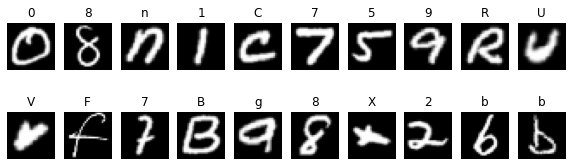

In [12]:
random_array = np.random.randint(train_x.shape[0], size=(2,10))
plt.figure(figsize=[10,3])
for i in range(10):
    plt.subplot(2,10,i+1)
    a = int(train_y[random_array[0,i]])
    plt.title(char_labels[a])
    plt.imshow(train_x[random_array[0,i]].reshape(28,28).squeeze().T, cmap='gray')
    plt.axis('off')
    plt.subplot(2,10,i+11)
    b = int(train_y[random_array[1,i]])
    plt.title(char_labels[b])
    plt.imshow(train_x[random_array[1,i]].reshape(28,28).squeeze().T, cmap='gray')
    plt.axis('off')